# HydroGeoSines

## How to correct groundwater heads from Earth tides and atmospheric pressure influences


### Import HGS
*Note*: Currently, the HydroGeoSines is not fully implemented as an installable package. Instead. we have to move to the parent directory, to import the package.

In [1]:
import os
os.chdir("../../")
print("Current Working Directory: " , os.getcwd())

Current Working Directory:  D:\WORK\GitHub\HydroGeoSines


In [2]:
# Load the HGS package
import hydrogeosines as hgs
# and other packages used in this illustration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import a dataset

Import data from a CSV file.

*Note*: This example dataset is based on [Rau et. al. (2020)](https://doi.org/10.5194/hess-24-6033-2020):

In [3]:
death_valley = hgs.Site('death valley', geoloc=[-116.471360, 36.408130, 688])
death_valley.import_csv('tests/data/death_valley/death_valley.csv',
                        input_category=["GW","BP","ET"], utc_offset=0, unit=["m","m","nstr"],
                        how="add", check_dublicates=True)

Datetime was 'naive'. Localized and converted to UTC!
A new time series was added ...
No dublicates found ...


Just for fun, we invoke [PyGTide](https://github.com/hydrogeoscience/pygtide) to add theoretical Earth tide strains to the dataset:

In [4]:
death_valley.add_ET(et_comp='nstr')

ETERNA PREDICT v3.4 (10/02/2013) is calculating, please wait ...
Finished after 3.265 s
Earth tide time series were calculated and added ...


### Correcting groundwater hydraulic heads

Now we can correct the groundwater hydraulic heads:

In [5]:
process_dv = hgs.Processing(death_valley)

corrected = process_dv.GW_correct(et_method='ts', lag_h=8)

There were no gaps in the data after resampling!
The groundwater (GW) and  BP data is aligned. There is exactly one BP for every GW entry!
The groundwater (GW) and  BP data is aligned. There is exactly one BP for every GW entry!
The groundwater (GW) and  ET data is aligned. There is exactly one ET for every GW entry!
('BLM-1', 'all')
Reference: Method by Rasmussen and Crawford (1997) [doi:10.1111/j.1745-6584.1997.tb00111.x]


### Visualising the results

*Note*: The visualisation class is not yet finished. Therefore, we will access the data from the results object.

The corrected heads are in the results object:

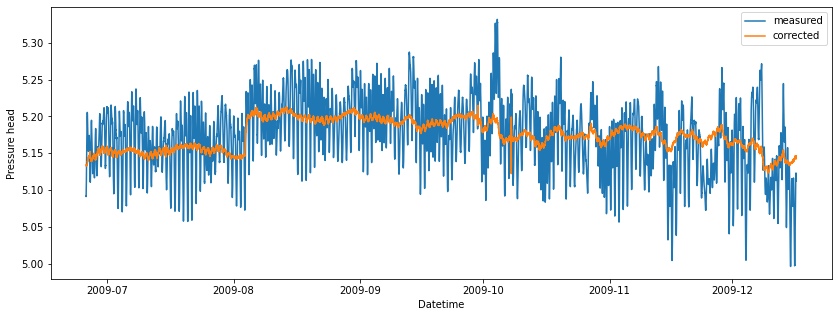

In [9]:
orig_heads = corrected['GW_correct'][('BLM-1', 'all')][1]['GW']
corr_heads = corrected['GW_correct'][('BLM-1', 'all')][0]['WLc']
datetime = corrected['GW_correct'][('BLM-1', 'all')][1].index

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(datetime, orig_heads, label='measured')
ax.plot(datetime, corr_heads, label='corrected')
ax.set_xlabel('Datetime')
ax.set_ylabel('Pressure head')
ax.legend()
plt.show()

Plot the barometric response function:

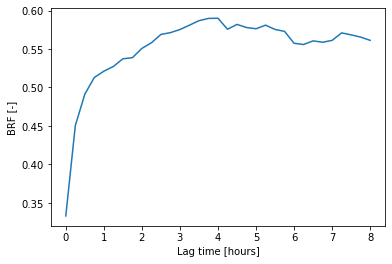

In [7]:
lags = corrected['GW_correct'][('BLM-1', 'all')][0]['brf']['lag']
crf = corrected['GW_correct'][('BLM-1', 'all')][0]['brf']['crf']

plt.plot(lags, crf)
plt.xlabel('Lag time [hours]')
plt.ylabel('BRF [-]')
plt.show()